In [ ]:
5b75650467568309733b6619713e3b0abef22bb4591cd19c7cf20e5349d55995ab67339458e56caa259c404646c8527a700ffd65fdeea9259b2c4f33f14a7b99

https://quantum-computing.ibm.com/account

In [1]:
import qiskit as q
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [11]:
# 2 quibits, 2 classical bits
circuit = q.QuantumCircuit(2,2)

# currently: 0,0
circuit.x(0)

# 1,0
# cnot, controlled not. Flips 2nd qubit value IF first qubit is 1
circuit.cx(0,1)

# 1, 1
circuit.measure([0, 1], [0, 1])

circuit.draw()

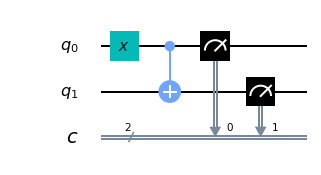

In [12]:
circuit.draw(output = "mpl")

In [13]:
from qiskit import IBMQ

In [16]:
IBMQ.save_account("5b75650467568309733b6619713e3b0abef22bb4591cd19c7cf20e5349d55995ab67339458e56caa259c404646c8527a700ffd65fdeea9259b2c4f33f14a7b99")

Credentials already present. Set overwrite=True to overwrite.


In [18]:
# On charge le compte sur le site https://quantum-computing.ibm.com/account
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().quibits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmqx2 has 27 queued and simulated qubits
ibmq_16_melbourne has 4 queued and simulated qubits
ibmq_vigo has 54 queued and simulated qubits
ibmq_ourense has 48 queued and simulated qubits
ibmq_london has 28 queued and simulated qubits
ibmq_burlington has 11 queued and simulated qubits
ibmq_essex has 22 queued and simulated qubits
ibmq_armonk has 2 queued and simulated qubits


In [20]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_burlington")

In [21]:
job = q.execute(circuit, backend = backend, shots = 500)

In [22]:
job_monitor(job)

Job Status: job has successfully run


In [23]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")
result = job.result()

In [24]:
counts = result.get_counts(circuit)

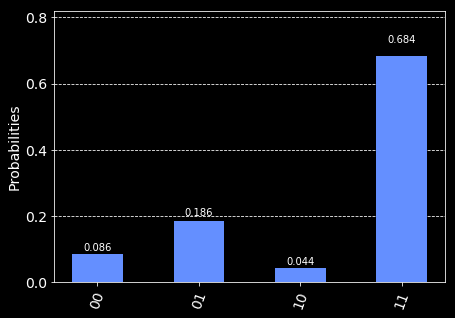

In [25]:
plot_histogram([counts])

In [26]:
backend = provider.get_backend("ibmq_qasm_simulator")
circuit = q.QuantumCircuit(2,2) # 2 quibits, 2 classical bits
# currently: 0, 0
circuit.h(0)
# 1, 0
circuit.cx(0,1) # cnot, controlled not. Flips 2nd qubit value IF first qubit is a 1
# 1, 1
circuit.measure([0,1], [0,1])
circuit.draw()

## How to simulate locally

In [27]:
# Charging a simulator framework for qiskit
from qiskit import Aer 

In [28]:
sim_backend = Aer.get_backend("qasm_simulator")

In [29]:
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator


Job Status: job has successfully run


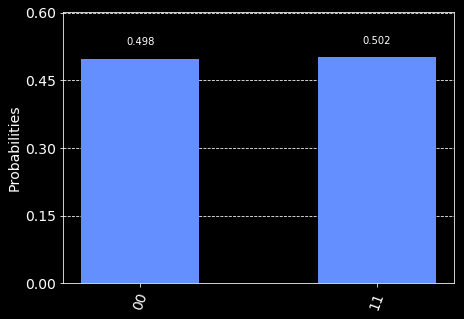

In [31]:
job = q.execute(circuit, backend = sim_backend, shots = 500)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])